# Probability and Uncertainty

Graduate Quantitative Economics and Datascience

Jesse Perla (University of British Columbia)

# Overview

## Summary

-   Will provide background on probability, simulation of randomness,
    independence, and expectations

## Extra Materials

-   <a href="https://python.quantecon.org/prob_matrix.html"
    target="_blank">QuantEcon Probability</a>
-   <a href="https://python.quantecon.org/prob_meaning.html"
    target="_blank">QuantEcon Meaning of Probability</a>
-   <a href="https://intro.quantecon.org/prob_dist.html"
    target="_blank">QuantEcon Distributions and Probabilities</a>
-   <a href="https://python.quantecon.org/lln_clt.html"
    target="_blank">QuantEcon LLN and CLT</a>

## Packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
from matplotlib.animation import FuncAnimation
import IPython.display

# Probability

## Definitions

To formalize probability always be careful to separate

1.  **Events** i.e., probability space.
2.  **Probability** an events occurs. i.e., probability measure
3.  **Value** or implications of an event. i.e., random variables

## Probability Space

**Probability space** is a $(\Omega, \mathcal{A})$:

-   Set $\Omega$ of possible **outcomes** and $\omega \in \Omega$ is a
    particular outcome

    -   e.g. $\Omega = \{U, E, R, D\}$ for unemployed, employed,
        retired, or dead

-   Subsets $A \subseteq \Omega$ are **events**

    -   e.g. $A = \{U, E\}$ is the event of being employed or unemployed
    -   $\Omega \setminus A = \{R, D\}$ (the `\setminus`) is event of
        not being either

-   The collection of all possible events is $\mathcal{A}$ where
    $A \in \mathcal{A}$

    -   $\Omega \in \mathcal{A}$, i.e. we can consider the event of any
        outcome occurring
    -   $\emptyset \in \mathcal{A}$, i.e. we can consider the event of
        nothing occurring

## Probability Measure

**Probability Measure** is a function which assigns a numerical value on
the likelihood of an event

-   For us, $\mathbb{P} : \mathcal{A} \rightarrow [0,1]$

    -   e.g. $\mathbb{P}(\{U, E\}) = 0.7$ is probability either $U$ or
        $E$
    -   $\mathbb{P}(\Omega \setminus \{U, E\}) = 0.3$

-   Will see denoted as a function, $\mu(A)$ for integrals in advanced
    uses

    -   Overkill for probability spaces with a finite, discrete number
        of elements
    -   Important for probability spaces with a continuous number of
        elements
    -   Essential for stochastic processes (e.g., flipping a coin until
        heads)

## Random Variables

**Random Variable**: $X(\omega)$ assigns a numerical value to a
particular outcome

-   $X : \Omega \rightarrow \mathbb{R}$, but could be vector or matrix
    valued

    -   e.g. $X(\omega = E) = 1$ if employed, $X(\omega = U) = 0$ if
        unemployed. Useful for doing counts

-   Or $X(\omega = E) = \$40,000$ if employed,
    $X(\omega = U) = \$15,000$ if unemployed. Useful for finding average
    incomes

-   Random variables defined on $\Omega$, and inherit the probability
    measure

    -   So can query values like $\mathbb{P}(X =\$40,000)$

## Axioms of Probability

Probability measure $\mathbb{P}$ on probability space
$(\Omega, \mathcal{A})$ must satisfy axioms:

-   **Non-negativity**: $\mathbb{P}(A) \geq 0$
-   **Normalization**: $\mathbb{P}(\Omega) = 1$
-   **Additivity**: If $A \cap B = \emptyset$, then
    $\mathbb{P}(A \cup B) = \mathbb{P}(A) + \mathbb{P}(B)$

These imply other results such as:

-   $\mathbb{P}(\emptyset) = 0$
-   $\mathbb{P}(A \cup B) = \mathbb{P}(A) + \mathbb{P}(B) - \mathbb{P}(A \cap B)$
-   $\mathbb{P}(\Omega \setminus A) = 1 - \mathbb{P}(A)$

# Discrete Distributions

## Discrete Distributions

-   A discrete probability spaces have finite (or countable) number of
    outcomes

-   When convenient, we can number the outcomes arbitrarily as
    $n = 1,\ldots N$ (or $\infty$) and then work with
    $\Omega = \{1, \ldots N\}$ and $\omega \in \Omega$

-   Axioms especially simple because we use
    $\mathbb{P}(\omega = n) = p_n$,

    -   **Non-negativity**: $p_n \geq 0$
    -   **Normalization**: $\sum\limits_{n=1}^{N} p_n = 1$
    -   **Additivity**: $\mathbb{P}(A) = \sum\limits_{n \in A} p_n$

## Random Variables

-   Notation can become a little confusing because we will sometimes use
    the same index number for the event and for the random value, but
    they are separate!

-   Frequently we will assign the random variable as just that index

    -   $X(\omega = n) = n$ and then denote $\mathbb{P}(X = n) = p_n$

-   Other times we may want to associate a value with each outcome

    -   $X(\omega = n) = x_n$ and then denote
        $\mathbb{P}(X = x_n) = p_n$

## PDF and CDF

-   **Probability Mass Function (PMF)** is the probability of a single
    outcome for random variable $X$. Will assume $X$ itself has discrete
    values $$
    p_n \equiv \mathbb{P}(X = n)
    $$

-   **Cumulative Distribution Function (CDF)** is the probability of all
    outcomes less than or equal to a particular outcome. $$
    \mathbb{P}(X \leq n) = \sum\limits_{i=1}^{n} p_i
    $$

## Expectation

-   Expectation of a random variable is the sum of the values weighted
    by the probabilities. Continuous $\Omega$ uses integrals, or measure
    theory if “weird”
-   Especially easy to compute for discrete random variables $$
    \mathbb{E}[X] = \sum_{n=1}^N x_n \mathbb{P}(X = x_n)
    $$
-   Generalized to functions of a random variables $$
    \mathbb{E}[f(X)] = \sum_{n=1}^N f(x_n) \mathbb{P}(X = x_n)
    $$

## Expectations and Linear Algebra

Vectors can help with the accounting and notation of expectations. Let

-   $x \equiv \begin{bmatrix} x_1 & x_2 & \ldots & x_N \end{bmatrix}^{\top}$
    be the list of values for the random variable $X$
-   $p \equiv \begin{bmatrix} p_1 & p_2 & \ldots & p_N \end{bmatrix}^{\top}$
    be the list of probabilities
-   Then the expectation is (broadcasting $f(\cdot)$ across $x$ as
    required)

$$
\begin{aligned}
\mathbb{E}[X] &= \sum_{n=1}^N x_n \mathbb{P}(X = x_n) = p \cdot x = p^{\top} x\\
\mathbb{E}[f(X)] &= \sum_{n=1}^N f(x_n) \mathbb{P}(X = x_n) = p \cdot f(x) = p^{\top} f(x)
\end{aligned}
$$

## Example with a Discrete Distribution

-   $\Omega = \{U, E, R\}$
-   $\mathbb{P}(U) = 0.1, \mathbb{P}(E) = 0.8, \mathbb{P}(R) = 0.1$
-   $X(U) = 15000, X(E) = 40000, X(R) = 10000$
-   $\mathbb{E}[X]$ and $\mathbb{E}[\sqrt{X}]$

In [3]:
p = np.array([0.1, 0.8, 0.1])
x = np.array([15000, 40000, 10000])
def f(x):
    return np.sqrt(x)
print(f"E(X) = {p @ x}")
print(f"E(f(X)) = {p @ f(x)}")
print(f"CDF(X) = {np.cumsum(p)}")

E(X) = 34500.0
E(f(X)) = 182.2474487139159
CDF(X) = [0.1 0.9 1. ]

Note that the CDF was easy to calculate as cumulative sums.
Interpretable?

## Using the `discrete_rv`

-   `scipy.stats` has a `discrete_rv` type with built-in functions
-   Might need to start with sorted `x` values
-   Useful for working with discrete random variables

In [4]:
p = np.array([0.1, 0.1, 0.8])
x = np.array([10000, 15000, 40000])
u = scipy.stats.rv_discrete(
  values=(x, p))
samples = u.rvs(size=5)
print(f"E(X) = {u.mean()}")
print(f"E(f(X)) = {u.expect(f)}")
print(f"CDF(X) = {u.cdf(x)}")
print(f"Samples of X = {samples}")

E(X) = 34500.0
E(f(X)) = 182.2474487139159
CDF(X) = [0.1 0.2 1. ]
Samples of X = [40000 40000 40000 40000 15000]

## Histogram $N=50$

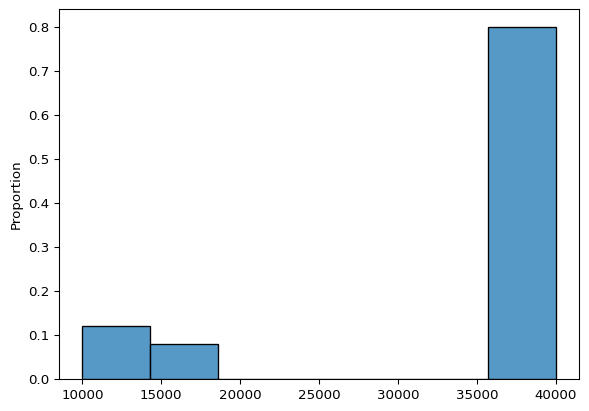

In [5]:
N = 50
samples = u.rvs(size=N)
ax = sns.histplot(samples,
  stat="proportion")

# Alternative
# Density doesn't add up
# plt.hist(samples_1,
#   density=True)
# Or must build barchart

## Histogram $N=500$

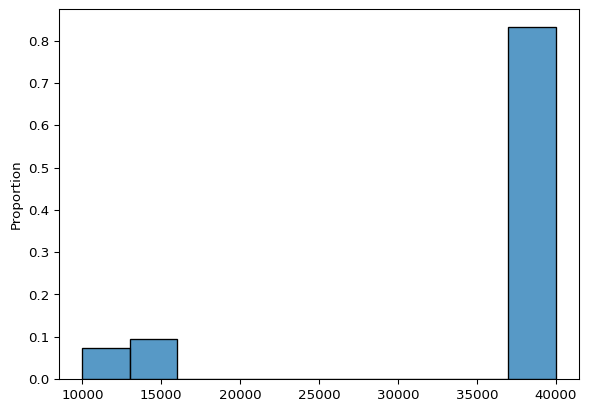

In [6]:
N = 500
samples = u.rvs(size=N)
ax = sns.histplot(samples,
  stat="proportion")

## The Binomial Distribution

For $n = 1 \ldots N$, the **binomial distribution** is defined by the
PMF

$$
\displaystyle 
\begin{aligned}
\mathbb{P}(X = n) &= \binom{N}{n} \theta^n (1-\theta)^{N-n}\\
\mathbb{E}(X) &= \sum_{n=0}^N n \binom{N}{n} \theta^n (1-\theta)^{N-n} = N \theta
\end{aligned}
$$

In [7]:
N = 10
θ = 0.5
u = scipy.stats.binom(N, θ)
print(f"Mean: {u.mean():.2f}")
print(f"Variance: {u.var():.2f}")
print(f"Draws of u: {u.rvs(5)}")

Mean: 5.00
Variance: 2.50
Draws of u: [3 3 5 4 5]

## The Binomial Probability Mass Function

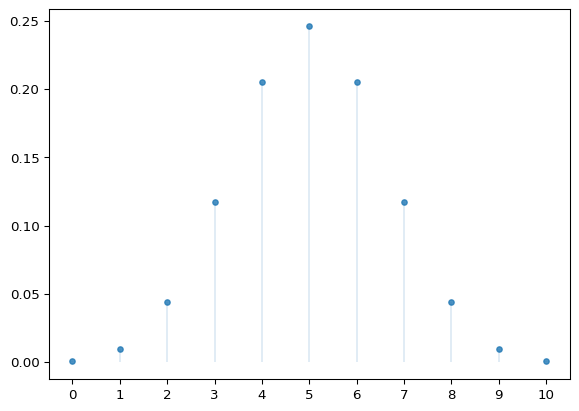

In [8]:
grid = np.arange(N+1)
u_pmf = u.pmf(grid)

fig, ax = plt.subplots()
ax.plot(grid, u_pmf,
  linestyle='',
  marker='o',
  alpha=0.8, ms=4)
ax.vlines(grid, 0,
  u_pmf,
  lw=0.2)
ax.set_xticks(grid)
plt.show()

## The Binomial Cumulative Distribution Function

$$
\mathbb{P}(X \leq n) = \sum_{i=0}^n \binom{N}{i} \theta^i (1-\theta)^{N-i}
$$

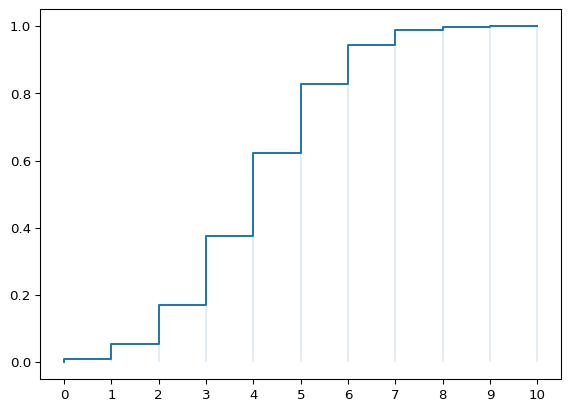

In [9]:
grid = np.arange(N+1)
u_cdf = u.cdf(grid)

fig, ax = plt.subplots()
ax.step(grid, u_cdf)
ax.vlines(grid, 0, u_cdf,
  lw=0.2)
ax.set_xticks(grid)
plt.show()

## Histogram $N=50$

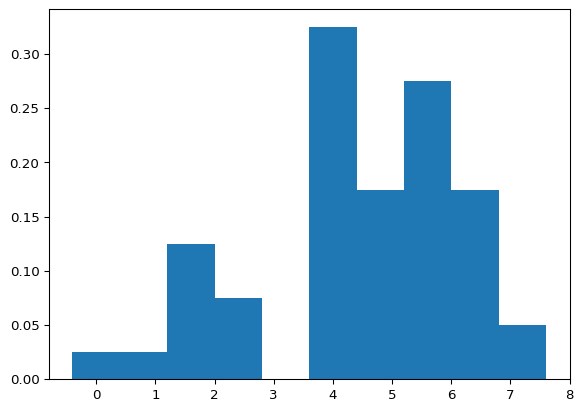

In [10]:
N = 50
u = scipy.stats.binom(10, 0.5)
plt.hist(u.rvs(size=N),
  density=True,
  align='left')
plt.show()

## Histogram $N=5000$

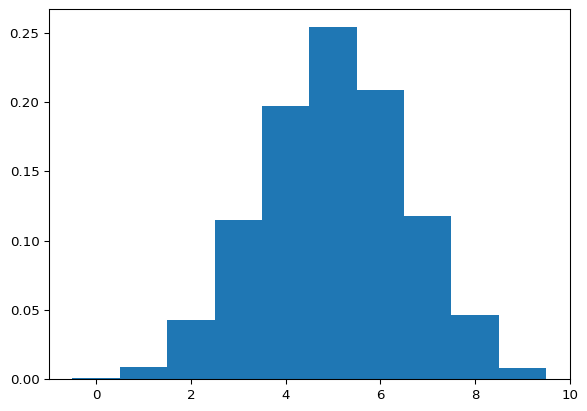

In [11]:
N = 5000
u = scipy.stats.binom(10, 0.5)
plt.hist(u.rvs(size=N),
  density=True,
  align='left')
plt.show()

# LLN and CLT

## Law of Large Numbers (LLN)

-   A classic LLN is the [Strong Law of Large
    Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers#Strong_law)

-   Take a sequence of independent, identically distributed random
    variables $X_1, X_2, \ldots$ with $\mathbb{E}[X_i] = \mu$ and
    $\mathbb{V}[X_i] = \sigma^2 < \infty$. Then,

    -   If $X_n$ is a random variable then
        $\bar{X}_N \equiv \frac{1}{N}\sum_{i=1}^N X_n$ is also an RV
    -   The law says for any $\epsilon > 0$,
        $\lim_{N\to\infty} \mathbb{P}(|\bar{X}_N - \mu| > \epsilon) \rightarrow 0$
    -   Sometimes denoted $\bar{X}_N \xrightarrow{p} \mu$ for
        “convergence in probability”

-   Powerful and frequently used, but remember assumptions!

## Visualizing the LLN with Gaussian RVs $N=20$

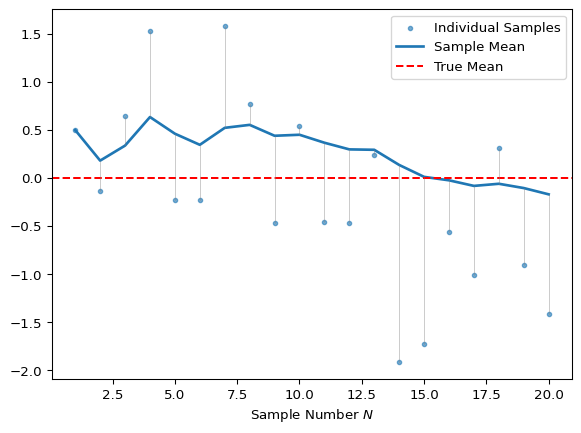

In [12]:
N = 20  # Number of samples
mu, sigma = 0, 1
np.random.seed(42)
samples = np.random.normal(mu, sigma, N)
sample_means = np.cumsum(samples) / np.arange(1, N + 1)
plt.scatter(range(1, N + 1), samples, label='Individual Samples', alpha=0.6, s=10)
plt.plot(range(1, N + 1), sample_means, label='Sample Mean', linewidth=2)
plt.axhline(mu, color='r', linestyle='--', label='True Mean')
for n in range(N): # add lines to samples from sample mean
    plt.plot([n + 1, n + 1], [sample_means[n], samples[n]], color='gray', linewidth=0.5, alpha=0.6)
plt.xlabel('Sample Number $N$')
plt.legend()
plt.show()

## Visualizing the LLN with Gaussian RVs $N=100$

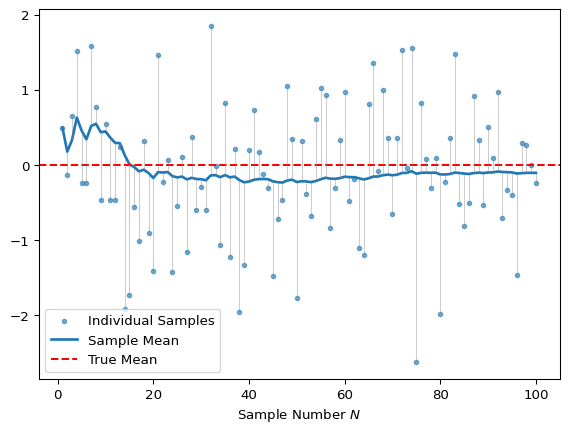

In [13]:
N = 100  # Number of samples
mu, sigma = 0, 1
np.random.seed(42)
samples = np.random.normal(mu, sigma, N)
sample_means = np.cumsum(samples) / np.arange(1, N + 1)
plt.scatter(range(1, N + 1), samples, label='Individual Samples', alpha=0.6, s=10)
plt.plot(range(1, N + 1), sample_means, label='Sample Mean', linewidth=2)
plt.axhline(mu, color='r', linestyle='--', label='True Mean')
for n in range(N): # add lines to samples from sample mean
    plt.plot([n + 1, n + 1], [sample_means[n], samples[n]], color='gray', linewidth=0.5, alpha=0.6)
plt.xlabel('Sample Number $N$')
plt.legend()
plt.show()

## Pareto Distributions

-   Pareto distributions are a family of distributions with a power-law
    tail

-   Parameterized by $(x_m, \alpha)$ with the PDF $$
    p(x) = \frac{\alpha x_m^{\alpha}}{x^{\alpha+1}}
    $$

-   The mean is $\mathbb{E}[X] = \frac{\alpha x_m}{\alpha - 1}$ for
    $\alpha > 1$

-   The variance is
    $\mathbb{V}[X] = \frac{\alpha x_m^2}{(\alpha - 1)^2(\alpha - 2)}$
    for $\alpha > 2$

A distribution with pdf $p(x)$ is power-law if
$p(x) \propto x^{-\alpha}$ for some $\alpha > 0$ as
$x \rightarrow \infty$. More formally, if
$\lim_{x\to\infty}\frac{\log p(x)}{\log x} = -\alpha$

## Visualizing the Sample Means for a Pareto Distribution

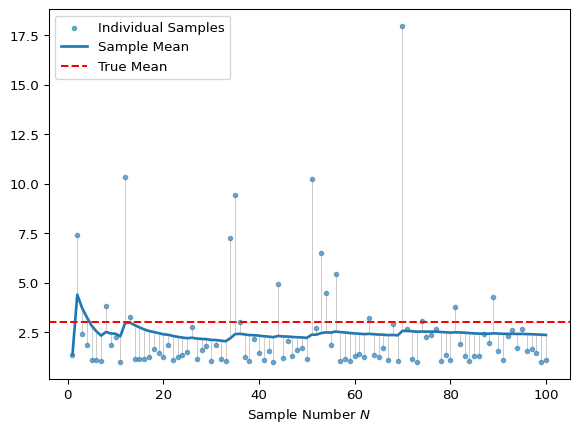

In [14]:
N = 100 # Number of samples
alpha = 1.5
np.random.seed(42)
dist = scipy.stats.pareto(alpha)
samples = dist.rvs(size=N)
sample_means = np.cumsum(samples) / np.arange(1, N + 1)
plt.scatter(range(1, N + 1), samples, label='Individual Samples', alpha=0.6, s=10)
plt.plot(range(1, N + 1), sample_means, label='Sample Mean', linewidth=2)
plt.axhline(dist.mean(), color='r', linestyle='--', label='True Mean')
for n in range(N): # add lines to samples from sample mean
    plt.plot([n + 1, n + 1], [sample_means[n], samples[n]], color='gray', linewidth=0.5, alpha=0.6)
plt.xlabel('Sample Number $N$')
plt.legend()
plt.show()

## Central Limit Theorem (CLT)

-   The [Central Limit
    Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) (CLT)
    is a classic result in statistics

-   Again, lets assume we have IID observations with
    $\mathbb{E}[X_i] = \mu$ and $\mathbb{V}[X_i] = \sigma^2 < \infty$

-   Define the sample mean
    $\bar{X}_N \equiv \frac{1}{N} \sum_{i=1}^N X_i$

-   Then the CLT is

    $$
    \sqrt{n} \left( \bar{X}_n - \mu \right) \xrightarrow{d} \mathcal{N}(0, \sigma^2)
    $$

    -   That notation means [converges in
        distribution](https://en.wikipedia.org/wiki/Convergence_of_random_variables#Convergence_in_distribution),
        which roughly means that as $n\to\infty$ the CDF are getting
        closer to each other

## Visualizing the CLT with Exponential Distributions

-   See [QuantEcon CLT
    lecture](https://python.quantecon.org/lln_clt.html#clt) for the
    source.
-   Exponential distributions $p(x) = \lambda e^{-\lambda x}$ for
    $\lambda = 0.5$

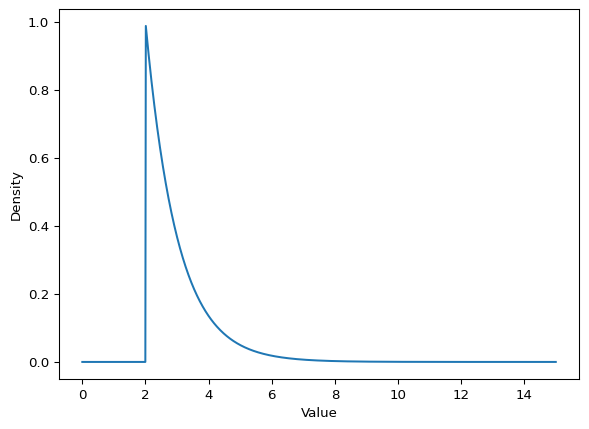

In [15]:
distribution = scipy.stats.expon(1/0.5)
mu, s = distribution.mean(), distribution.std()
x = np.linspace(0, 15.0, 1000)
y = distribution.pdf(x)
plt.plot(x, y)
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

## CLT of Exponential to $N=100$

In [16]:
fig, ax = plt.subplots()
def update(n):
    ax.clear()
    data = distribution.rvs((5000, n))
    sample_means = data.mean(axis=1)
    Y = np.sqrt(n) * (sample_means - mu)
    ax.set_xlim(-3 * s, 3 * s)
    ax.set_ylim(0, 0.5)
    ax.hist(Y, bins=60, alpha=0.5,
      density=True)
    ax.set_title(f"CLT for $N = {n}$")
ani = FuncAnimation(fig,update,
  frames=range(1, 100, 5),
  interval=500,blit=False, repeat=False)
plt.close()
IPython.display.HTML(ani.to_html5_video())

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAVRBtZGF0AAACrQYF//+p
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwOCAzMWUxOWY5IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMyAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTMg
bG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRl
cmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJf
cHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9
MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTIgc2NlbmVjdXQ9NDAgaW50cmFfcmVm
cmVzaD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42
MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAABHQ
ZYiEABb//vfTP8yy6/c5teOo96KeJl9DdSUBm5bE7TqAAAADAAADAAAGvSr7K7R1sayeIAAABnhj
3fLIDElkcQByhdpaYaQfQhaFbCT2uoKR/WKZMpuD/TW9mJ8WKEMeuuAeJMKKd02uj0KvlRRW1JBT
KoG7H6FeZfqH28SCwNdDEpRxE/ubsHAKEIoIdapP+6r1f0enp2vO6wTZlnqHSOR/w3mJaE+QOA5a
+HUH3SUT0oabgT1MT3fotzQWDAzg3KoqKHl8wlzfMmuiK3SDQZJk1bu4Wn+Bvwh6++9ec/jQGhQ7
zUgwU9MbB7u9lwVPruDQpWLzJI914HTv27jGKUUM1DPlz/ctU19y/+eySenBRpO33IkCNEtLt7WY
KKUT9jeb7lFAl5yBSQpIudLEa/tDzDh9NWlwUgYkVme7H/2/ob+ieA3YLfzZ7yaeTENqbabcbSDW
r1KkaVWpwO96heSizLVbQlUh1l6T1TCQFvuPczPht7y2Uqq/C3FsgZL/ZmwUQ2PBtkBpneQQ8uZ+
2eHy/B7eT6kWJr65PeoUtR6h2bdCnv64W1IRSRQFiTDQwwGY8KmUAbRJOa4DqstA5frJABUY6WhU
nqbZX/c23G9iD1JOIMlOw9mr8/BbAvHZFX7uHRgQapd3xdgp9H92X19d4GjD8JHp3e+WnzmGxBCl
O9QlbS4mrbfG13P6f//+tD2b55upc/SM+4d7pm9+qv/ykD6PcG+GNJGsu3BSC4z7T9dsjHV3WugU
5wnE0Xzkf1RWL2lUJCXMH/xK6pso8nXDqAyDbB2CK/0Ith1ySwDqtc08AwWlOW2XifBL30bHz3Z+
1+AQQckUqt9wX15Ovu67UX2g41oNhGfud6SIdMf10+vn0E8L+YZGi2gBbIAF2pQgJcGqfj65Ilh2
ufyMn79TUcSbO0p5UjFJnXOynsDt1KN5VlZtOud4h8GFkjcGwduyXG0rPV9KEhiyl+F0YA+P23qz
mrRJZeyEgdqF6DdgYGkuXhHwxjRDeDMvQoL0eRqFDLINlvGQ60WoboS8TpAkH3aTTkNl4smMPZ5x
jsRghIJJTCuBcD9b8h5W9j6lP0mOV7LBRlLc+7qekriVCUImvmWLTiLYSWP1Kf7roqzH9d7Zfu2G
TvTmiHWg7neUHy2aGTsk2ULnEe6/dnwwQoe9cZr4hFOUuT6Z5eI/FOrFKlmps+paA2s1ruYGkl34
sYn2Dem2ZrXZXWm0H2qf0UCXtSbmVhWpd1ZcZRzv3roedr0FopmklVx9yax2sGEg3zXFh0zwfiuW
/+0qYrXIuGAn3cJHCt261lHkFTnV/bYNKoXeBn8kab9fdxh0ZKjAB8NAXznqTZJhQ5Y0tP+Guv/W
6fAQVO9Ks+TOtlomK4V2VtQURM6soGnSSXz9acSxhjnljHCpf1mUFTZHHme6lBEJa63iRBIaX71x
ZVZ/aLCTPvNoO5sqztp0xh5UuKo06fs7rGDU7NadIdE083FEyMAe5JdwIy4JLbMsDzfaeaGq6NO8
d7X266Yp8YrJbjilkwaSp3GyFffJBQUN+QibnWaMGkM6wH0Kx/3wVXBSx2Lr9nRzZpttVNvd2ciW
2+b7K5U2xlm35e5JmCcxx3j83yk/NFUTl/pYtKeE5T6q5MATjB05NTcbS1VcdVVQvycYzCkidLwf
l30Du2Dd39rAgLpDnlNJXInavXeT1vXOV75hVzqMkRZN+490+1pSrrLbam7T8JMgyPaXnCyQqXQq
r+rWbFhUKbZ+wfoUqUhBkd8fULWy4+HUoq6OCtNIEdPWFKmxFjTa6gKEd6fsvzroTjHjI9UQJkrS
mpn2KinBeZsD60zjS1E23+eYaY4c/WqU95lBssE0AqGFeiHwYiGIxLnQCLgAyAYWXHFrVH7jc4E/
mXZ9M5N37Yomj3j21nM/hz7nEsuvXN/e44e6/R4T9/u9T8rrYi1vIjyS6o8AsyArETXB0PG6yEdO
h2hDXneYSrT13VvVy1rQuv7vEXvEXVWddM03TYjOKRG4ZvsQJGHpcNWSCGsJqbAvKWDocVzaJmtf
slw7r/wONBDNxY9ryTLyGG+d1I5fjqkLwBKvs1O3LrMOZjR1IxNZdZ+nlDWGlEJGFuSReSvnWc6Q
yWkxiw0gI2NKsL3moOx8/m4NiXQzHGrxoTAEKlxMdeSThOj22//Ebh52fzlCIV5yI+xilODcICBq
l6XVdN9uTMJnvgCKg+ltYFuyEx40PwM7ewh0uCvQv+pl5PdGTy18zFHszQsVQEEc38wxu3Y2dUW9
9fuNquK73CNDvFo0MINISsiX6uZwOxkQjCvS4AdXeMTDPR90Pw5ojvHZLrILfWUbGq8HCQC1fYhK
b1bnScXXwJn7GmcxMmoR6mb6HiK/i7oHpnk/H1U6itPTAupJjzRt1c3jArNcK7sgt+N/M0XO9pL0
XkDJ0K2zh3oB4MnsrFx8dGsLwZ/qCXdgrMbim9f6RXpt4HX1cijW/2OT6J+jGFdRm2i+TFj4gdTh
0hC6su8nMiSjJhc7QLpfC/29g8Q9Vyn8rrE3G1xT04W8/3LDEIZrsPP9ZS1iQn9a76sVlaxsXTvY
xMcq5oHld0y9MnXZrl5S1wU3wmb4IhDLSBdYQnkEcXNU/Yk6DMHNpFT5D3T5fR33jRQaFIRBCq/W
S+BomVxKD/0v2hPFe8swpHO/7SMj8Nl0nP66Txdvjl+QTvicykP+bw4GYKuH623RIMdf2alMZOeQ
gs9Syj7np2zK3/39N8gcMUq27/OuH4E+Tc+KStISlYg7xQtI1glwhQVqnt5rMQ/bjtrVP5spDTuL
4YczLAbMXpy/j9gV9bXtNJhjFeNqPemA7/BldoNc4uJw3r46QaGkZYnNSRRPxJGzbzPqSYPS9slt
O+e9CFQRXF2gctD3HgZ6m

## CLT of Exponential to $N=2000$

In [17]:
fig, ax = plt.subplots()
def update(n):
    ax.clear()
    data = distribution.rvs((10000, n))
    sample_means = data.mean(axis=1)
    Y = np.sqrt(n) * (sample_means - mu)
    ax.set_xlim(-3 * s, 3 * s)
    ax.set_ylim(0, 0.5)
    ax.hist(Y, bins=60, alpha=0.5, density=True)
    ax.set_title(f"CLT for $N = {n}$")
    x = np.linspace(-3 * s, 3 * s, 100)
    ax.plot(x, scipy.stats.norm.pdf(x, 0, s), 'r-', lw=2, alpha=0.7, label='N(0, 1)')    
ani = FuncAnimation(fig,update,frames=range(1, 2000, 250), interval=500,blit=False, repeat=False)
plt.close()
IPython.display.HTML(ani.to_html5_video())

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAZ9ZtZGF0AAACrQYF//+p
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwOCAzMWUxOWY5IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMyAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTMg
bG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRl
cmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJf
cHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9
MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTIgc2NlbmVjdXQ9NDAgaW50cmFfcmVm
cmVzaD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42
MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAACJM
ZYiEABb//vfTP8yy6/c5teOo96KeJl9DdSUBm5bE7TqAAAADAAADAAAGvSr7K7R1sayeIAAABnhj
3fLIDFA++AAcS1VmPuKIW8B22S19ITHljQt26yDLunxsupjwYYS2qzfvksXCxej3IKq667II+Puo
njpYsPINmR7vq3qlIG31gd3xSlJRw5HgWDvQfc/73NHhL7P1QNcVYYIL1BHIuNHstrdrSHfOM44Z
dO/RIqdAo54scZkLRKWZG2FMLvLFSVxKhrrf3eU+3ul1YzXu/2Pyv12a4KWUroQ+a9yq1DUZGWei
1o5H2wh0gWBCjdcY6ReXyILH+dkYQpINFcckPd46F8JPeNDD1M/5/s6zyug4SO9Svw2BVM1C2+BB
Z6TdSTBxjcal/X99/dgqVO14U+1hvc2MoMmtml4UaLu1SbpwsvDJ7Jv6h5YCLPT+IlJmOK+Bfo6h
01U4aumKF8GH2hcgBOVKxfJOP7pz1Ht2Sxv6eS/r8W1D2l8Yt+xlgYSK8Ieq7Zvmq03Ee7sga82o
0o8dfvcGeljER174gYN7X2mXVdwYeIs/UfOHxEpWCxW2VQmAi+Toi+UjFkZZ9GaXzgsQVQuA1H83
BiVDUi7ynbcVBWs25C+8R8kEF0XkP6zXlhwlqgL//6vsKNFwlwuI/aR4kgeB7X/3VJZ8FVAYLXJ1
nnGxfA22B9pLASGRptek8sKaUctFBxnWWIO8rQOFjUmVxUfcy4Eh2h3Z3SMkas+V+/ba6pAsB9Xn
BL3ljEYWv+vuBZQJAUqNZkwF5G1h4G+gfvC/GNYlzOSXVRK2mg/E/tlXbBTzNFESVQVVqDOaChrN
1hV+pd46AmceJ5jQORPJ6XOglUdCrKFxzxwzSeKs1ZrDK5xbYK6HccmA7PeMCmNWHcegbs7r5Iek
+45L3HAynX1D9mwLteNLuZvJKNQ8NVPozjTkf2165dlwzMnKJqcDU2GRjA1a8rj56EAIAiDmSk/R
WkoA+ZERr7boruguZkIHPDuqhqtFIBF+1LogDj5lpfXfCOGQYnFvIuElw63+zP2NPY0R/lj9ym5F
+j9DGmXTVseBxrljjtfOlZRfW4PuEbc27JrhP6XnJoa28Rzy7Ul9AmR8KQB+aQ8SqGS1RJMev9dl
dabQfap/RQJcFP/rObCz//Vr3vOfvULfq7lcC71ygeZdY6x2h1dYbwrz7DzG0gaf8gIMJcv3Ccxc
evm7mUCmHIh6NIb/nzHZWNXxV0+3gvwiqhlIuFcZZ8vKuHif/V3f83sJdORzOzAq/mxorgNUu1ef
oWzOQwOkDBw3sbBmDA3fc8a5Mmbv0lsGd4He0WSMyK+KZQjKBq5NbcbNLQ3L6oHd6YkmJqOS3eOU
ORwTzoGFEN/oGpCQ+khqhKXEwOtJUX78R8zfk5e5OL5bqtLYqmArAwS94HuaoNpnIn/NdyQFbvQH
6MRqQjS3BOmA18Vt76ahrX+7w4rJGX1Dy4Ph8EA8fKT3nIVrIfGf4Jra6cigjTsABMLwcnXGCCFN
qbMAIP0gBcL26+r1WJ9i9HzKqSdC9ZWYg0Sn6nPyhuCPoO6jPMaSQtSc71Sm2TG7KwlC7B/olu3K
IdG/K3BHBBGxpAFwfn3idtauNEWDQpdYIHzRmb+LymYZVRXun7n9Q4p1nJ4Qfxu2IEMvfkcfhGBg
EBveGytncmQZvHGFLQReUTiJSmp81QDydgNgp2t/MLpshqrfieNrumyF0m18RV+BF5ZNXPnByDti
J4ZbDa1u1pPGkXK7zLahSt/LTAGJUch0/DltmrnOFkA6narfWT+k+RBekpqO0CAcv987qhWUw3jj
9EAdcwhr9erki6Y1xhkBVwhJbXT0k2nMEOiYjsClxmlq1ynFLeP+f04l5dbJYeD5PO6n8wpQFMu+
ev2RiAkrVPWPyjvR3nFsGV6kBFvmjvgADr84X05lY1DCoc6wXVMxUV3QshRzdMXWhEf3U560XVpJ
AmsoqGBRHiolPFlemGXxOOkuM2+Q7HrZ0AxSNxvSCFoBg8SqfTnxemntnaCebjNrNomrHEY/bl/U
Q9KXbckide1jHIC1qqETwj/ftdoVkdaj9f7qjQynGS0z1zjauv13DFoWrtJ4RAB0KIxAC+FQz97e
ykPHfIm9PdNy08O20mw6E4Oic8p/B/XORT9aLMdGBy4mmZHJboJWISoVeW2Sgjpsf6YaYZO3K00L
589DTN2IHu3XuK/jrUbFh3C+UT9snogOewQDL95l4+fsvVlBKN3iOETYZ6NGwQ2A/mIkO8GuE1zy
aKgekD3ObUMTaSGYHdjYAdzBqntSKd2W7+NcaFA1yH2h/0pV8Cm6iKIttDO8SnvPA4kmIqoM31jx
3zIo5bUnWfFmvuUFP5+gN0UGwUBUMo9xE5c9M5cNZ0UE9AZ81hU8kTxF5WSHjNTgW2GrcWGz06df
Yfp9QwinnKkkV+50hj9rX5m+gXa+ygohAN1tS/wrPfTbzFF3webpK9izTW6tKpb1bErFsEFEw0DD
6BUugrXXE2anVxzdvxJu/87Pbf9gtnrqldPPIaQTUPbPdMDq1eyTKwfRlk9QsbGJoY7Md4uMOVNy
szGJueN/Le/+hGIQOSJE40eKyzmibCo/vLah7eTYXmhqjjQv3kq7vMb5QFr0cCSwRchCGzYIkKjL
AjswdiyxQXZEvZGlz4A6IozFyMSVgv0UckntOvc8s5VnYzwaf3jskoodNwe/u5War2+IAQL48NRB
Z6zQohEHwEp04c7bU3WUsEwgCJSaotDWGuYRgivO0YRSjAz3ZhPfCGzULtDabNTm1MffbzwJGms8
AUSOfg921toYfqg0qNsBkBAzTiUxkXsOADalMNh7JZhBNYbDZ+6ASIK8g2ytDzoByd4irIOTj/fk
3XxZcwGY2wZ5KQz+pxyT9

# Joint Distributions

## Joint Probability Distributions

-   Key concepts are **marginal distributions**, **conditional
    distributions**, **independence**, and **conditional expectations**
-   Will demonstrate with bivariate discretely valued distributions
    -   Similar for multivariate distributions, except we replace sums
        with sums over multiple indices
    -   Similar for continuous or mixed discrete-continuous
        distributions, except we replace sums with integrals
-   Interpretation of the joint distribution of $X$ and $Y$ is the
    probability of each pair of outcomes occurs
    -   e.g., prob you get a cash transfer and are unemployed, don’t get
        a cash transfer and are unemployed, get a cash transfer and are
        employed, etc.

## Bivariate Probability Distributions

-   Let $X,Y$ be two discrete random variables that take values:

    $$
    X\in\{1,\ldots,I\},\quad Y\in\{1,\ldots,J\}
    $$

-   Then their **joint distribution** is described by a matrix

    $$
    P\equiv[\mathbb{P}(X=i,Y=j)]_{i=1\ldots I, j=1,\ldots J}\in \mathbb{R}^{I\times J}
    $$

-   Which fulfills the key axioms of probability

$$
\begin{aligned}
p_{ij}\equiv\mathbb{P}(X=i,Y=j) &\geq 0\\
\sum_{i=1}^{I}\sum_{j=1}^{J}p_{ij}=1
\end{aligned}
$$

## Marginal Probability Distributions

-   The joint distribution induces marginal distributions

    $$
    \begin{aligned}
    \mathbb{P}(X=i)& = \sum_{j=1}^{J}p_{ij} = \mu_i, \quad i=1,\ldots,I\\
    \mathbb{P}(Y=j)&= \sum_{i=1}^{I}p_{ij} = \nu_j, \quad j=1,\ldots,J 
    \end{aligned}
    $$

-   The marginal distributions are also probability distributions

    -   i.e., $\mu_i \geq 0$ and $\sum_{i=1}^{I} \mu_i = 1$
    -   e.g. the probability you were given a conditional cash transfer
        regardless of your employment status

## Conditional Probability

-   Conditional probabilities are defined according to

    $$
    \mathbb{P}(A \,|\, B)=\frac{\mathbb{P}(A \cap B)}{\mathbb{P}(B)}
    $$

-   $A \cap B$ is the event that both $A$ and $B$ occur, i.e., the
    intersection

    -   e.g. you were given a conditional cash transfer AND you were
        unemployed

-   The conditional probability is the probability of $A$ given $B$ has
    occurred

    -   e.g. the probability you were given a conditional cash transfer
        given you were unemployed

## Conditional Distributions

For a pair of discrete random variables, we have the **conditional
distribution**

$$
\mathbb{P}(X=i|Y=j)=\frac{p_{ij}}{\sum_{i=1}^{I}p_{ij}} 
=\frac{\mathbb{P}(X=i, Y=j)}{\mathbb{P}(Y=j)}
$$

-   Fix $Y=j$, then the conditional distribution of $X \,|\,Y=j$ is a
    probability distribution. Trivially positive since $p_ij \geq 0$.
    Verify it sums to $1$

$$
\sum_{i=1}^{I}\mathbb{P}(X=i\,|\,Y=j)
=\frac{\sum_{i=1}^{I}p_{ij}}{\sum_{i=1}^{I}p_{ij}}=1
$$

## Law of Total Probability

-   **Law of Total Probability** is a useful identity for conditional
    probabilities
    -   Let $A_1, \ldots, A_N$ be a partition of $\Omega$
    -   i.e., $\Omega = \cup_{i=1}^{N} A_i$ and
        $A_i \cap A_j = \emptyset$ for $i \neq j$
-   Then for any event $B$, $$
    \mathbb{P}(B) = \sum_{i=1}^{N} \mathbb{P}(B \cap A_i) = \sum_{i=1}^{N} \mathbb{P}(B \,|\, A_i) \mathbb{P}(A_i)
    $$
    -   e.g. the probability of being unemployed is the probability of
        being unemployed and getting a cash transfer plus the
        probability of being unemployed and not getting a cash transfer

## Statistical Independence

-   Random variables $X \sim p$ and $Y \sim g$ are statistically
    **independent** if

$$ 
\mathbb{P}(X=i,Y=j)=p_i g_j,\text{ for all } i, j
$$

-   i.e., the joint distribution is the product of the marginal
    distributions
-   e.g., the probability you were given a conditional cash transfer AND
    you were unemployed is probability you were given a conditional cash
    transfer $\times$ the probability you were unemployed

## Conditional Distributions and Independence

-   When $X$ and $Y$ are independent, use the definitions of conditional
    and marginal distributions

$$
\begin{aligned}
\mathbb{P}(X=i\,|\,Y=j) &=\frac{\mathbb{P}(X=i, Y=j)}{\mathbb{P}(Y=j)} =\frac{p_ig_j}{\sum_{i=1}^{I}p_ig_j}=\frac{p_ig_j}{g_j}=p_i \\
\mathbb{P}(Y=j\,|\,X=i) &=\frac{\mathbb{P}(X=i, Y=j)}{\mathbb{P}(X=i)} =\frac{p_ig_j}{\sum_{j=1}^{J}p_ig_j}=\frac{p_ig_j}{p_i}=g_j
\end{aligned}
$$ - i.e, independent $X$ and $Y$ implies the conditional distributions
are the marginals

-   $\mathbb{P}(X=i\,|\,Y=j) = \mathbb{P}(X=i)$ and
    $\mathbb{P}(Y=j\,|\,X=i) = \mathbb{P}(Y=j)$

## Notation for (Conditional) Independence

-   Let $X, Y, Z$ be random variables

-   Common notation for independence is

    $$
    \begin{aligned}
    X &\perp Y\\
    \mathbb{P}(X=x, Y=y) &= \mathbb{P}(X=x) \mathbb{P}(Y=y)
    \end{aligned}
    $$

-   Common notation for conditional independence

    $$
    \begin{aligned}
    X &\perp\!\!\!\perp Y \,|\, Z\\
    \mathbb{P}(X=x, Y=y | Z=z) &= \mathbb{P}(X=x | Z=z) \mathbb{P}(Y=y | Z=z)
    \end{aligned}
    $$

-   Central to causal inference and treatment effects

## Classic Example of Conditional Independence

-   Let $X$ be the number of cigarettes smoked per day
-   Let $Y$ be the number of years of life remaining
-   Let $Z$ be the number of years of smoking
-   Then $X \perp\!\!\!\perp Y \,|\, Z$
    -   i.e., the number of cigarettes smoked per day is independent of
        the number of years of life remaining given the number of years
        of smoking
    -   i.e., the number of cigarettes smoked per day is independent of
        the number of years of life remaining given the number of years
        of smoking

## Simpson’s “Paradox”

-   [Simpson’s
    paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox) is a
    warning on composition effects
-   Recall the law of total probability
    $\mathbb{P}(X = x| Y=y) = \sum_{z} \mathbb{P}(X = x| Y=y, Z=z) \mathbb{P}(Z=z| Y=y)$
-   Lets say you see $\mathbb{P}(X| Y=y_1) > \mathbb{P}(X| Y=y_2)$
    -   Might suggests positive relationship on $X$ and $Y$?
-   If $\mathbb{P}(X| Y=y_1, Z=z) < \mathbb{P}(X| Y=y_2, Z=z)$ for many
    $z$ then
    -   $X$ and $Y$ may have a negative relationship after conditioning
        on $Z$?

## UC Berkeley Gender Bias: Overall Data

| Total Applicants | Admitted | Men Applicants | Men Admitted | Women Applicants | Women Admitted |
|-------------|---------|-------------|------------|---------------|-------------|
| 12,763 | 41% | 8,442 | <span style="background-color:#9EFF9E;">44%</span> | 4,321 | 35% |

-   Classic example is the [Berkeley Gender
    Bias](https://en.wikipedia.org/wiki/Simpson%27s_paradox#UC_Berkeley_gender_bias)
    is a classic example of [Simpson’s
    paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox)
-   But if you look at individual departments the results are different
-   Seemed to show that 4 out of 85 departments had significant bias
    against women and 6 significant bias against men
-   But the biggest difference was in which departments women applied to
-   The following shows the top 6 departments to get a sense of
    heterogeneity

## Conditional Probabilities for 6 Largest Departments

| Dept | All Applicants | Admitted | Men Applicants | Men Admitted | Women Applicants | Women Admitted |
|------|------------|--------|------------|-----------|-------------|------------|
| A | 933 | 64% | <span style="background-color:#FE9;">**825**</span> | 62% | 108 | <span style="background-color:#9EFF9E;">82%</span> |
| B | 585 | 63% | <span style="background-color:#FE9;">**560**</span> | 63% | 25 | <span style="background-color:#9EFF9E;">68%</span> |
| C | 918 | 35% | 325 | <span style="background-color:#9EFF9E;">37%</span> | <span style="background-color:#FE9;">**593**</span> | 34% |
| D | 792 | 34% | <span style="background-color:#FE9;">417</span> | 33% | 375 | <span style="background-color:#9EFF9E;">35%</span> |
| E | 584 | 25% | 191 | <span style="background-color:#9EFF9E;">28%</span> | <span style="background-color:#FE9;">**393**</span> | 24% |
| F | 714 | 6% | <span style="background-color:#FE9;">373</span> | 6% | 341 | <span style="background-color:#9EFF9E;">7%</span> |

<span style="background-color:#FE9;">greater number of applicants than
other gender</span> and <span style="background-color:#9EFF9E;">less
number of applicants than other gender</span> **bold** the two “most
applied for” departments for each gender

## Explanation Using Conditional Probabilities

Overall, $\mathbb{P}(\text{Admitted | Men}) = 0.44$ and
$\mathbb{P}(\text{Admitted | Women}) = 0.35$

But this is different when conditioning on departments!

-   $\mathbb{P}(\text{Admitted | Men, A}) = 0.62$,
    $\mathbb{P}(\text{Admitted | Women, A}) = 0.82$
-   $\mathbb{P}(\text{Admitted | Men, B}) = 0.63$,
    $\mathbb{P}(\text{Admitted | Women, B}) = 0.68$
-   “Paradox” because women tend to apply to more competitive
    departments

## Does this Old Data Imply There was No Bias?

-   All data requires assumptions to interpret! Most assumptions are
    implicit, so you need to reflect on what assumptions you may have
    made
-   This simply corrected for the mechanical composition effect
-   Interpreting bias better requires reflecting on your “model” and
    assumptions
    -   Is average quality is identical conditional on department and
        gender? Especially in 1973 when there was enormous selection
        bias?
    -   What if bias leads women to apply to the more competitive
        departments?

## Bayes’ Law

Conditional probability is used for **Bayes’ Law**:

$$
\mathbb{P}(A \,|\, B)=\frac{\mathbb{P}(B \,|\, A)\mathbb{P}(A)}{\mathbb{P}(B)}
$$

Sometimes:

-   $\mathbb{P}(B\,|\,A)$ is called the “likelihood”
-   $\mathbb{P}(A)$ is called the “prior”
-   $\mathbb{P}(A\,|\,B)$ is called the “posterior”
-   $\mathbb{P}(B)$ is called the “marginal likelihood”, which
    normalizes the expression

## Example with Bayes’ Law

$A$ is the event of being unemployed, $B$ is the event of getting a cash
transfer

-   $\mathbb{P}(B\,|\,A)$ is the probability of being given a cash
    transfer given you were unemployed
-   $\mathbb{P}(A)$ is the probability of being unemployed within the
    whole distribution
-   $\mathbb{P}(A\,|\,B)$ is the probability of being unemployed given
    you were given a cash transfer
-   $\mathbb{P}(B)$ is the probability of being given a cash transfer
    within the whole distribution
-   **Bayes’ law**: probability of being unemployed given you were given
    a cash transfer $\propto$ probability of being given cash transfer
    given you were unemployed $\times$ probability of being unemployed

## Bayes Law with Bivariate Random Variables

-   For discrete bi-variate random variables, we can write Bayes’ Law as

    $$
    \mathbb{P}(X=i\,|\,Y=j)=\frac{\mathbb{P}(X=i,Y=j)}{\mathbb{P}(Y=j)}=\frac{\mathbb{P}(Y=j\,|\,X=i)\mathbb{P}(X=i)}{\mathbb{P}(Y=j)}
    $$

-   If $X$ and $Y$ are independent

    -   $\mathbb{P}(Y=j\,|\,X=i) = \mathbb{P}(Y=j)$
    -   Bayes’ Law simplifies to just the marginal distribution

    $$
    \mathbb{P}(X=i\,|\,Y=j) = \mathbb{P}(X=i)
    $$

## Calculating Marginal Distributions

-   Lets create a bivariate $\mathbb{P}(X=i, Y=j)$ with $I=5$ and $J=4$
-   Use matrix $P$ to calculate $\mathbb{P}(X=i)$ and $\mathbb{P}(Y=j)$

In [18]:
np.set_printoptions(precision=3)
P = np.array([[0.05, 0.07, 0.02, 0.01],
              [0.04, 0.1,  0.06, 0.03],
              [0.08, 0.09, 0.07, 0.04],
              [0.02, 0.03, 0.02, 0.01],
              [0.09, 0.08, 0.04, 0.05]])

print(f"sum = 1? {np.isclose(P.sum(), 1.0)}")
print(f"p_ij >= 0? {np.all(P >= 0)}")
margin_x = P.sum(axis=1) # sum over j
margin_y = P.sum(axis=0) # sum over i
print(f"P(X=i) = {margin_x}")
print(f"Sum_i P(X=i) = {margin_x.sum()}")
print(f"P(Y=j) = {margin_y}")
print(f"Sum_j P(Y=j) = {margin_y.sum()}")

sum = 1? True
p_ij >= 0? True
P(X=i) = [0.15 0.23 0.28 0.08 0.26]
Sum_i P(X=i) = 0.9999999999999999
P(Y=j) = [0.28 0.37 0.21 0.14]
Sum_j P(Y=j) = 1.0

## Calculating Conditional Distributions

-   Now use $P$ to calculate $\mathbb{P}(X=i\,|\,Y=j)$, etc. <!--
    Code to check: 
    cond_x_y = np.row_stack(
      P[:,i] / margin_y[i] for i in range(4))
    cond_x_y.sum(axis=1)
    (P / margin_y[np.newaxis, :]).T - cond_x_y
    cond_y_x = np.row_stack(
      P[j,:] / margin_x[j] for j in range(5))
    cond_y_x.sum(axis=1)  
    (P.T / margin_x[np.newaxis, :]).T - cond_y_x
    -->

In [19]:
print(f"P(X=i|Y=1)=\n{P[:,0] / margin_y[0]}\,")
cond_x_y = np.row_stack(
  [P[:,i] / margin_y[i] for i in range(4)])
# or (P / margin_y[np.newaxis, :]).T
cond_y_x = np.row_stack(
  [P[j,:] / margin_x[j] for j in range(5)])
# or (P.T / margin_x[np.newaxis, :]).T
print(f"P(X=i|Y=2)=\n{cond_x_y[:, 1]}")
print(f"sum_i P(X=i|Y=2)=\
{cond_x_y[1,:].sum():.2f}")
print(f"P(Y=j|X=1)=\n{cond_y_x[:, 0]}")

P(X=i|Y=1)=
[0.179 0.143 0.286 0.071 0.321]\,
P(X=i|Y=2)=
[0.143 0.27  0.286 0.214]
sum_i P(X=i|Y=2)=1.00
P(Y=j|X=1)=
[0.333 0.174 0.286 0.25  0.346]

<>:1: SyntaxWarning: invalid escape sequence '\,'
<>:1: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipykernel_4561/981323285.py:1: SyntaxWarning: invalid escape sequence '\,'
  print(f"P(X=i|Y=1)=\n{P[:,0] / margin_y[0]}\,")
/tmp/ipykernel_4561/981323285.py:2: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  cond_x_y = np.row_stack(
/tmp/ipykernel_4561/981323285.py:5: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  cond_y_x = np.row_stack(

## Check Bayes’ Law

$$
\mathbb{P}(X=1\,|\,Y=2) = \frac{\mathbb{P}(Y=2\,|\,X=1)\mathbb{P}(X=1)}{\mathbb{P}(Y=2)}
$$

In [20]:
x = 1
y = 2
p_y_x = cond_y_x[x-1, y-1]
p_x = margin_x[x-1]
p_y = margin_y[y-1]
p_x_y = cond_x_y[y-1, x-1]
p_bayes = p_y_x * p_x / p_y
print(f"P(Y={y}|X={x}) = {p_y_x:.2g}")
print(f"P(X={x}) = {p_x:.2g}")
print(f"P(Y={y}) = {p_y:.2g}")
print(f"P(X={x}|Y={y})={p_x_y:.2g}")
print(f"P(Y={y}|X={x})P(X={x})\
/P(Y={y})={p_bayes:.2g}")

P(Y=2|X=1) = 0.47
P(X=1) = 0.15
P(Y=2) = 0.37
P(X=1|Y=2)=0.19
P(Y=2|X=1)P(X=1)/P(Y=2)=0.19

# Conditional Expectations

## Conditional Expectation

-   Recall: $\mathbb{P}(X=i\,|\,Y=j)$ is itself a probability
    distribution if we vary $j$

-   A **conditional expectation** is an expectation using the
    conditional probability distribution. For a discrete random variable
    $X$ and $Y$, $$
    \mathbb{E}[X\,|\,Y=j] = \sum_{i=1}^{I} i\, \mathbb{P}(X=i\,|\,Y=j)
    $$

-   If $X$ and $Y$ are independent then

    -   Recall that $\mathbb{P}(X=i\,|\,Y=j) = \mathbb{P}(X=i)$
    -   Which implies $\mathbb{E}[X\,|\,Y=j] = \mathbb{E}[X]$
    -   That the expected value of $X$ is the same regardless of the
        value of $Y$

## Key Properties of Expectations

-   Let $A$ and $B$ be scalar/vector/matrix constants, and $X$ and $Y$
    are scalar/vector/matrix random variables

-   Expectations are **linear operators**, which gives us some useful
    properties

    -   $\mathbb{E}[A X + B Y] = A \mathbb{E}[X] + B \mathbb{E}[Y]$

-   $\mathbb{E}[X Y] \neq \mathbb{E}[X] \mathbb{E}[Y]$ in general

    -   But if $X$ and $Y$ are independent, then
        $\mathbb{E}[X Y] = \mathbb{E}[X] \mathbb{E}[Y]$

-   $\mathbb{E}[f(X)] \neq f(\mathbb{E}[X])$ in geneal

    -   Unless $f(\cdot)$ is linear or if $X$ is degenerate (i.e., a
        constant)

-   **Jensen’s Inequality**: If $f(\cdot)$ is a convex function, then
    $\mathbb{E}[f(X)] \geq f(\mathbb{E}[X])$

## Law of Total Expectations

-   Let $\{A_1, \ldots, A_N\}$ be a partition of $\Omega$. For any
    random variable $X$,
-   **Law of Total Expectations**

$$
  \mathbb{E}[X] = \sum_{i=1}^{N} \mathbb{E}[X \,|\, A_i] \mathbb{P}(A_i)
$$

-   e.g. the expected value of income is the expected value of income
    given you were unemployed times the probability of being unemployed
    plus the expected value of income given you were employed times the
    probability of being employed

Related decomposition is the [Law of Total
Variances](https://en.wikipedia.org/wiki/Law_of_total_variance):
$\mathbb{V}[X] = \mathbb{E}[\mathbb{V}[Y\,|\,X]] + \mathbb{V}[\mathbb{E}[Y\,|\,X]]$

## Conditional Expectations and Iterated Expectations

-   Same properties all hold
    e.g. $\mathbb{E}[A X + B Y \,|\, Z] = A \mathbb{E}[X \,|\, Z] + B \mathbb{E}[Y \,|\, Z]$

-   Conditional expectations are themselves random variables if the
    conditional is. e.g. $\mathbb{E}[X \,|\, Y]$ is a random variable in
    $Y$

-   **Law of Iterated Expectations**

    $$
    \mathbb{E}\left[\mathbb{E}[X\,|\,Y]\right] = \mathbb{E}[X]
    $$

    -   The expected value of $X$ is the average of the conditional
        expectations of $X$ given $Y$ over the distribution of $Y$
    -   Similarly for conditionals:
        $\mathbb{E}\left[\mathbb{E}[X\,|\,Y, Z]\, |\, Z\right] =  \mathbb{E}[X\,|\,Z]$

## Calculating Conditional Expectations

Assign an RV to each state then find $\mathbb{E}[X\,|\,Y=1]$

In [21]:
P = np.array([[0.05, 0.07, 0.02, 0.01],
              [0.04, 0.1,  0.06, 0.03],
              [0.08, 0.09, 0.07, 0.04],
              [0.02, 0.03, 0.02, 0.01],
              [0.09, 0.08, 0.04, 0.05]])
margin_x = P.sum(axis=1)
margin_y = P.sum(axis=0)
cond_x_y = (P / margin_y[np.newaxis, :]).T
cond_y_x = (P.T / margin_x[np.newaxis, :]).T
# Give RV values to states
vals_x = np.arange(P.shape[0]) + 1
vals_y = np.arange(P.shape[1]) + 1

print("E(X | Y = 1) =",
  np.sum([vals_x[i]*cond_x_y[0,i]
          for i in range(0,5)]))

E(X | Y = 1) = 3.2142857142857144

## Conditional Expectations and the Law of Iterated Expectations

In [22]:
E_x_y = np.array([
  np.sum([vals_x[i]*cond_x_y[j,i]
          for i in range(0,5)])
  for j in range(0,4)])
E_y_x = np.array([
  np.sum([vals_y[j]*cond_y_x[i,j]
          for j in range(0,4)])
  for i in range(0,5)])      
# Or use np broadcasting with *
E_x_y = np.sum(vals_x * cond_x_y, axis=1)
E_y_x = np.sum(vals_y * cond_y_x, axis=1)
print("E(X | Y = j) =", E_x_y)
print("E(Y | X = i) =", E_y_x)
print(f"E(X) = {vals_x @ margin_x:.3g},\
  E(E(X|Y)) = {E_x_y @ margin_y}")

E(X | Y = j) = [3.214 2.865 3.    3.429]
E(Y | X = i) = [1.933 2.348 2.25  2.25  2.192]
E(X) = 3.07,  E(E(X|Y)) = 3.07

## Tips for using Numpy Broadcasting

1.  **Don’t**
    -   Loops, list comprehensions (e.g.,
        `[x[i, i+1] for i in range(5)]`), or a combination are usually
        clearer and often fast enough
2.  Write the slow version first
3.  Ask Github Copilot or ChatGPT to do a numpy broadcasting version
4.  Test it for a few values! Easy to make mistakes
5.  For more advanced usage you may be working in a ML library. If so,
    then packages such as
    [jax.vmap](https://jax.readthedocs.io/en/latest/jax-101/03-vectorization.html)
    of
    [torch.vmap](https://pytorch.org/docs/master/generated/torch.func.vmap.html#torch.func.vmap)
    help